# 熱伝達

$q_c = \alpha_c \cdot (\theta_s - \theta_f)$

* $q_c$ ... 対流による伝熱量 [$W/m^2$]
* $\alpha_c$ ... 熱伝達率 [$W/m^2\cdot K$]
* $\theta_s$ ... 個体壁表面温 [${}^\circ\mathrm{C}$]
* $\theta_f$ ... 壁体から十分離れた流体(空気)の温度 [${}^\circ\mathrm{C}$]

(最新建築環境工学 P.35, P.185)

In [93]:
#matplotlib inline

import matplotlib.pyplot as plt
import math


In [75]:
#空気熱容量の計算

ro_air = 1.024  # [kg/m^3]  （920hPa,37℃,相対湿度50％RH）
c_air = 1.007   # [kJ/kg・K] （920hPa,37℃）
cro_air = ro_air * c_air  #[kJ/m^3・K]

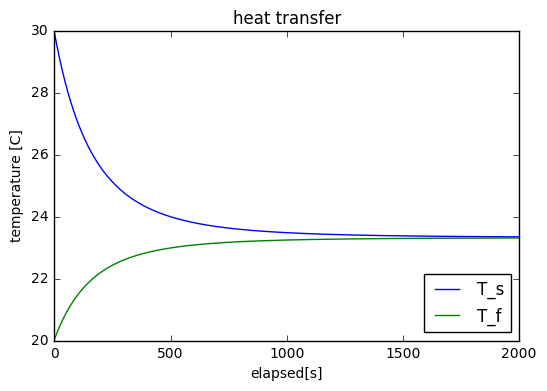

In [200]:
#壁(厚みは無視する)
T_s = 30    #壁表面温度40度
cro_s = 854 # [kJ/m^3・K]
depth = 0.001  #厚み 0.001m
S = 6 #面積 6m^2
C_s = cro_s * 1000 * S * depth #6m^2,1mmのせっこうボードの熱容量[J/K]

#空気
T_f = 20  #空気温度 20度
C_f = cro_air * 1000 * 10    #10m^3の空気熱容量[J/K]

#c値
#-----
#暖房時の天井面または冷房時の床表面=2.67
#暖房時の床表面または冷房時の天井面=0.64～0.87
#垂直壁表面=1.98
c = 1.98
#自然対流熱伝達率
def alpha_c_natural_ventilation(dT):
    return c * math.pow(dT, 0.25) 
alpha_c = alpha_c_natural_ventilation

#単位時間 dt[s]
dt = 1

data = []
for i in range(2000):
    #対流熱伝達[W/m2] = [J/s/m2]
    dT = T_s - T_f
    q = alpha_c(dT) * dT
    U = q * S * dt
    
    #温度変化の計算
    dT_s = - U * dt / C_s
    dT_f = U * dt / C_f
    T_s = T_s + dT_s
    T_f = T_f + dT_f
    data.append((i*dt, T_s, T_f))

#表示
x = [x[0] for x in data]
plt.title("heat transfer")
plt.plot(x, [y[1] for y in data], label="T_s")
plt.plot(x, [y[2] for y in data], label="T_f")
#plt.ylim(0,50)
plt.xlabel("elapsed[s]")
plt.ylabel("temperature [C]")
plt.legend(loc="lower right")
plt.show()